# Case Study : Questions

(1) Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

NCR 709
Bangalore 635
Mumbai 449


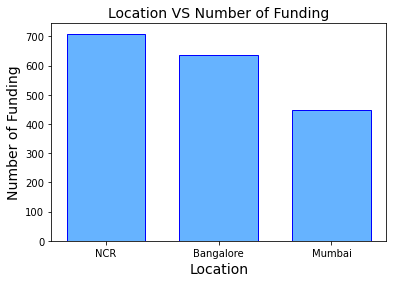

The location where startups has received funding maximum number of times: NCR


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
df=pd.read_csv('datasets/startup_funding.csv')
df=df['CityLocation'].str.split(' /').str[0]
df=df.str.split('/').str[0]
df.replace("bangalore","Bangalore",inplace=True)
df.replace("Delhi","New Delhi",inplace=True)
df.replace("New Delhi","NCR",inplace=True)
df.replace("Gurgaon","NCR",inplace=True)
df.replace("Noida","NCR",inplace=True)

freq=df.value_counts()[0:3]
x=freq.index
y=freq.values
for i in range(len(x)):
    print(x[i],y[i])
plt.bar(x,y,color='#66b3ff',width=0.7,edgecolor='blue')
plt.xlabel('Location',size=14)
plt.ylabel('Number of Funding',size=14)
plt.title('Location VS Number of Funding',size=14)
plt.show()
print('The location where startups has received funding maximum number of times:',x[0])

#### From the plot, the location where the most number of funding is done came out to be NCR(NCR include Gurgaon, Noida and New Delhi)

(3) After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

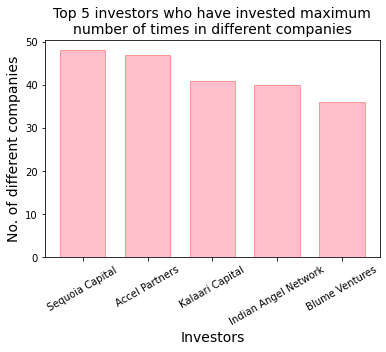

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
file=pd.read_csv('datasets/startup_funding.csv')
file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
file['StartupName'].replace('Olacabs','Ola',inplace=True)
file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
file=file[file.InvestorsName!='Undisclosed Investors']
file=file[file.InvestorsName!='Undisclosed investors']
np_startup=np.array(file.StartupName)
np_investors=np.array(file.InvestorsName,dtype=str)
investor=[]
startup=[]
for i in range(len(np_startup)):
    if ',' not in np_investors[i]:
        investor.append(np_investors[i])
        startup.append(np_startup[i])
    else:
        string=np_investors[i].strip().split(',')
        for j in string:
            if(j.strip()!=''):
                investor.append(j.strip())
                startup.append(np_startup[i])
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]
plt.bar(np_x, np_y,color='pink',width=0.7,edgecolor='#ff9999')
plt.xlabel('Investors',size=14)
plt.ylabel('No. of different companies',size=14)
plt.title('Top 5 investors who have invested maximum\nnumber of times in different companies',size=14)
plt.xticks(rotation=30)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])    

#### Top 5 investors who have invested maximum number of times in different companies:
#### 1. Sequoia Capital   2. Accel Partners   3. Kalaari Capital   4. Indian Angel Network   5. Blume Ventures

(4) Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

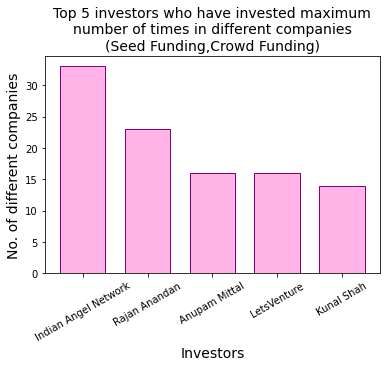

Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Kunal Shah 14


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
file=pd.read_csv('datasets/startup_funding.csv')

file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)

file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
file['StartupName'].replace('Olacabs','Ola',inplace=True)
file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
file=file[file.InvestmentType!='Private Equity']
file=file[file.InvestmentType!='Debt Funding']
file=file[file.InvestorsName!='Undisclosed Investors']
file=file[file.InvestorsName!='Undisclosed investors']
np_startup=np.array(file.StartupName)
np_investors=np.array(file.InvestorsName,dtype=str)
investor=[]
startup=[]
for i in range(len(np_startup)):
    if ',' not in np_investors[i]:
        investor.append(np_investors[i])
        startup.append(np_startup[i])
    else:
        string=np_investors[i].strip().split(',')
        for j in string:
            if(j.strip()!=''):
                investor.append(j.strip())
                startup.append(np_startup[i])
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]
plt.bar(np_x, np_y,color='#ffb3e6',width=0.7,edgecolor='purple')
plt.xlabel('Investors',size=14)
plt.ylabel('No. of different companies',size=14)
plt.title('Top 5 investors who have invested maximum\nnumber of times in different companies\n(Seed Funding,Crowd Funding)',size=14)
plt.xticks(rotation=30)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i]) 

#### Top 5 investors who have invested maximum number of times in different companies(Seed Funding , Crowd Funding):
#### 1. Indian Angel Network   2. Rajan Anandan   3. Anupam Mittal   4. LetsVenture   5. Kunal Shah

(5) Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

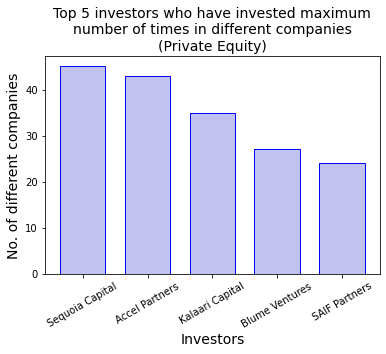

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
file=pd.read_csv('datasets/startup_funding.csv')

file['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
file['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
file['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)

file['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
file['StartupName'].replace('Ola Cabs','Ola',inplace=True)
file['StartupName'].replace('Olacabs','Ola',inplace=True)
file['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
file['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
file['StartupName'].replace('OyoRooms','Oyo',inplace=True)
file['StartupName'].replace('Oyorooms','Oyo',inplace=True)
file['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
file=file[file.InvestmentType=='Private Equity']
file=file[file.InvestorsName!='Undisclosed Investors']
file=file[file.InvestorsName!='Undisclosed investors']

np_startup=np.array(file.StartupName)
np_investors=np.array(file.InvestorsName,dtype=str)
investor=[]
startup=[]
for i in range(len(np_startup)):
    if ',' not in np_investors[i]:
        investor.append(np_investors[i])
        startup.append(np_startup[i])
    else:
        string=np_investors[i].strip().split(',')
        for j in string:
            if(j.strip()!=''):
                investor.append(j.strip())
                startup.append(np_startup[i])
np_investors=np.array(investor)
np_startup=np.array(startup)
dic={}
for i in range(len(np_startup)):
    s=set()
    if np_investors[i] in dic.keys():
        dic[np_investors[i]].add(np_startup[i])
    else:
        s.add(np_startup[i])
        dic[np_investors[i]]=s
d={}
for i in dic.keys():
    if i in d.keys():
        d[i]+=len(dic[i])
    else:
        d[i]=len(dic[i])
x=[]
y=[]
for i in d.keys():
    x.append(i)
    y.append(d[i])
np_x=np.array(x)
np_y=np.array(y)

np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.bar(np_x, np_y,color='#c2c2f0',width=0.7,edgecolor='blue')
plt.xlabel('Investors',size=14)
plt.ylabel('No. of different companies',size=14)
plt.title('Top 5 investors who have invested maximum\nnumber of times in different companies\n(Private Equity)',size=14)
plt.xticks(rotation=30)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i]) 

#### Top 5 investors who have invested maximum number of times in different companies(Private Equity):
#### 1. Sequoia Capital 2. Accel Partners 3. Kalaari Capital 4. Blume Ventures 5. SAIF Partners

(5) Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

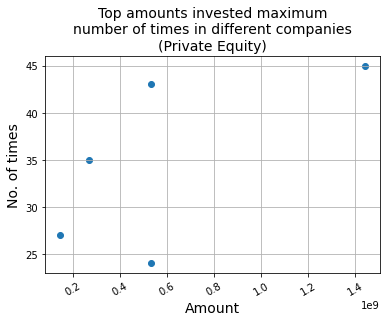

In [81]:
file['AmountInUSD'].fillna(0, inplace=True)

s2=set()
for i in range(len(np_x)):
    s2.add(np_x[i])
    
np_amount=np.array(file.AmountInUSD,dtype=str)
np_investors=np.array(file.InvestorsName,dtype=str)

investor=[]
amount=[]
for i in range(len(np_amount)):
    if ',' not in np_investors[i]:
        investor.append(np_investors[i])
        np_amount[i]=np_amount[i].strip()
        amount.append(int(np_amount[i].replace(',', '')))
    else:
        string=np_investors[i].strip().split(',')
        for j in string:
            if(j.strip()!=''):
                investor.append(j.strip())
                np_amount[i]=np_amount[i].strip()
                amount.append(int(np_amount[i].replace(',', '')))
                
np_investors=np.array(investor)
np_amount=np.array(amount)

dic={}
for i in range(len(np_amount)):
    if np_investors[i] in dic.keys():
        dic[np_investors[i]]+=np_amount[i]
    else:
        dic[np_investors[i]]=np_amount[i]
    
d2={}
for i in dic.keys():
    if i in s2:
        d2[i]=dic[i];
        
# for i in d2:
#     print(i, d2[i]) 
    
# print('-------------------------------------------------------------')   

# for i in range(len(np_x)):
#     print(np_y[i],d2[np_x[i]])

x=[]
y=[]
for i in range(len(np_x)):
    x.append(d2[np_x[i]])
    y.append(np_y[i])
final_x=np.array(x)
final_y=np.array(y)

plt.scatter(final_x, final_y)
plt.xlabel('Amount',size=14)
plt.ylabel('No. of times',size=14)
plt.title('Top amounts invested maximum\nnumber of times in different companies\n(Private Equity)',size=14)
plt.xticks(rotation=30)
plt.grid()
plt.show()

# Future Scope:
1) under investment, over investment avoid -> according to top investors we will predict the ideal number of times a given amount should be invested